# Project Team: JSS
**Code Jupyter Notebook Submission**

*ECEN 758 Project - Fall 2023*

**Team Members:**
*   Janvita Reddy Peddagudreddygari (634005984)
*   Sidharth Thazhathedathu (427009745)
*   Satya Prakash Kodamanchili (733000499)

**Reader Guidelines:**

1. This code is designed to fetch data from the web, eliminating the need for input files.
2. Optimize performance by running this Notebook on Google Colab with T4 GPU Runtime for faster results.
3. The pivotal Final Model is located in the 4. Final Model section. For a quicker overview, run only up to that section.
4. Subsequent sections may take some time to execute. Your patience is appreciated.





In [ ]:
# Importing all the necessary packages
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings

from matplotlib.ticker import MaxNLocator

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Lambda, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# displaying warning
warnings.warn('ignore')

<ipython-input-3-a68b9c94e32e>:35: UserWarning: ignore
  warnings.warn('ignore')


In [ ]:
# Importing the Fashion MNIST Data directly from the Tensorflow Datasets
fashion = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion.load_data()

4422102/4422102 [==============================] - 1s 0us/step


##1. Data Preparation

###1(a). Data Cleaning and Transformation
Checking Data Sanity and cleaning. The sanitized data is then transformed for enhanced model training and accuracy.

In [ ]:
# Checking the number of null values in the dataset
missing_values_Xtrain = np.isnan(X_train).sum()
missing_values_Ytrain = np.isnan(X_test).sum()
missing_values_Xtest = np.isnan(X_train).sum()
missing_values_Ytest = np.isnan(X_test).sum()
print(f'There are {missing_values_Xtrain+missing_values_Ytrain+missing_values_Xtest+missing_values_Ytest} missing values in the dataset')

There are 0 missing values in the dataset


MNIST is a clean dataset with no missing values.
Since MNIST consists of pixel values, there are no real outliers.

In [ ]:
label_map = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
             4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag",
             9: "Ankle boot"}
print("The Labels are coded like this:", label_map)

The Labels are coded like this: {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [ ]:
X_train_scale = X_train.reshape(-1, 28 * 28) / 255.0
X_test_scale = X_test.reshape(-1, 28 * 28) / 255.0

The code provided reshapes the three-dimensional training and test image datasets, `X_train` and `X_test`, into two-dimensional arrays, where each 28 by 28 pixel image is flattened into a single row of 784 pixels. Simultaneously, it normalizes the pixel values dividing by 255, converting them from integers in the range of 0 to 255 to floating-point numbers between 0 and 1. This preprocessing step, commonly applied in machine learning, facilitates a faster convergence during training and ensures that the scale of the pixel intensities doesn't disproportionately influence the model's learning process, thereby often leading to improved performance.

We already have 60000 training dataset and 10000 testing dataset. The train dataset is further split into train and validation dataset in the later stages where it is required. For few Machine Learning models, k-Fold cross validation is performed instead of separating a validation dataset.

##2. Exploratory Data Analysis
Unveiling Patterns and Insights by exploring the dataset manually without fitting any Machine Learning Models.

###2(a). Descriptive Statistics
Leveraging Descriptive Statistics for a Quantitative Snapshot of the Fashion MNIST Dataset.

In [ ]:
unique_lablels, unique_count = np.unique(Y_train, return_counts=True)
for i in range(10):
  print(f'There are {unique_count[i]} images of {label_map[i]} in dataset' )

There are 6000 images of T-shirt/top in dataset
There are 6000 images of Trouser in dataset
There are 6000 images of Pullover in dataset
There are 6000 images of Dress in dataset
There are 6000 images of Coat in dataset
There are 6000 images of Sandal in dataset
There are 6000 images of Shirt in dataset
There are 6000 images of Sneaker in dataset
There are 6000 images of Bag in dataset
There are 6000 images of Ankle boot in dataset


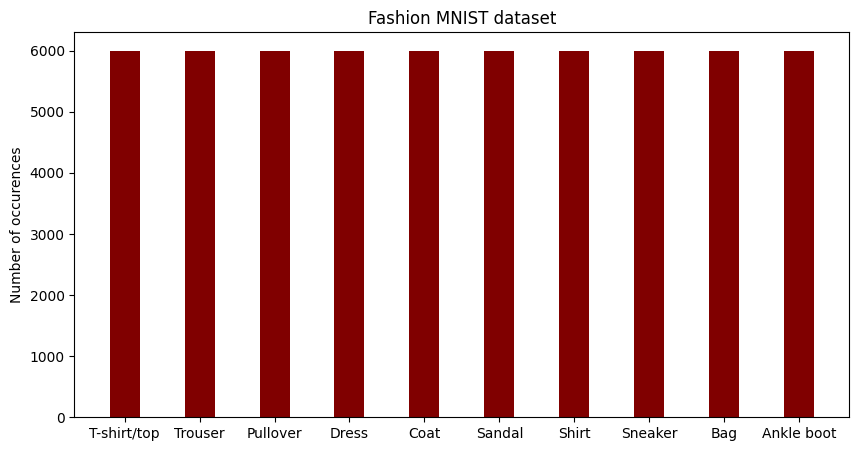

In [ ]:
class_labels = list(label_map.values())
values = list(i for i in unique_count)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(class_labels, values,
        width = 0.4, color = 'maroon')

plt.xlabel("")
plt.ylabel("Number of occurences")
plt.title("Fashion MNIST dataset")
plt.show()


In [ ]:
print("Training Set Statistics:")
print("Number of Samples:", X_train.shape[0])
print("Number of Features (Pixels):", X_train.shape[1] * X_train.shape[2])
print("Data Type:", X_train.dtype)
print("Minimum Pixel Value:", np.min(X_train))
print("Maximum Pixel Value:", np.max(X_train))
print("Mean Pixel Value:", np.mean(X_train))
print("Standard Deviation:", np.std(X_train))

Training Set Statistics:
Number of Samples: 60000
Number of Features (Pixels): 784
Data Type: uint8
Minimum Pixel Value: 0
Maximum Pixel Value: 255
Mean Pixel Value: 72.94035223214286
Standard Deviation: 90.02118235130519


The Fashion MNIST Dataset is a well-balanced dataset with all the categories having 6000 samples each.

###2(b). Data Visualisation
Employing Engaging Visualizations to Decode Complex Patterns in the Fashion MNIST Dataset.

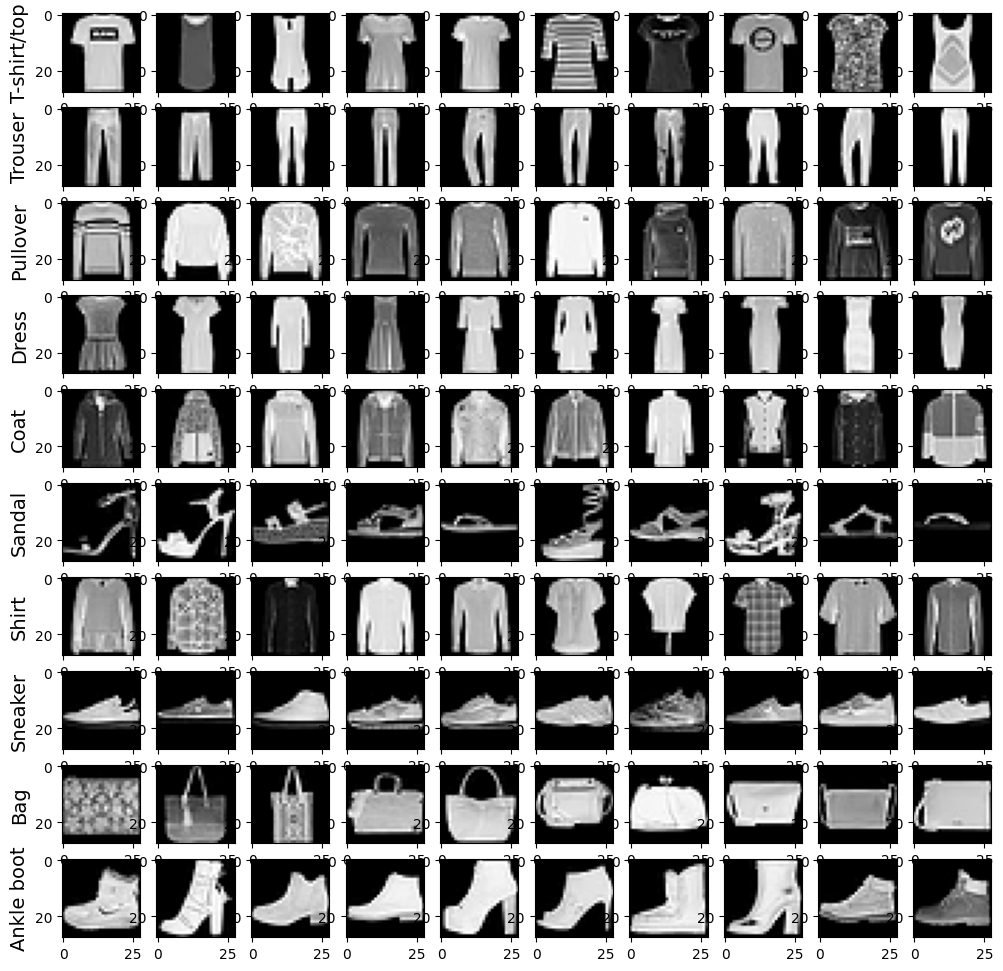

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for i in range(10):
  for j in range(10):
    axes[i, j].imshow(X_train[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(class_names[i], fontsize=14)

The above plot shows images of the first 10 items in each category.

##3. Final Model
The final model is chosen after testing different models and optimizing their hyperparameters. You can view the results by running this section for easy access and evaluation.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_X,val_X,train_y,val_y = train_test_split(train_images,train_labels,test_size = 0.2)

In [ ]:
def final_model():

  model = Sequential()
  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))
  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))
  model.add(layers.Activation('relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model

model = final_model()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images,train_labels, batch_size=15, epochs=20)

Epoch 1/20
4000/4000 [==============================] - 30s 5ms/step - loss: 0.4292 - accuracy: 0.8367
Epoch 2/20
4000/4000 [==============================] - 18s 5ms/step - loss: 0.2618 - accuracy: 0.9023
Epoch 3/20
4000/4000 [==============================] - 21s 5ms/step - loss: 0.2128 - accuracy: 0.9201
Epoch 4/20
4000/4000 [==============================] - 18s 5ms/step - loss: 0.1755 - accuracy: 0.9334
Epoch 5/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.1449 - accuracy: 0.9452
Epoch 6/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.1188 - accuracy: 0.9553
Epoch 7/20
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0951 - accuracy: 0.9637
Epoch 8/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0753 - accuracy: 0.9716
Epoch 9/20
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0621 - accuracy: 0.9773
Epoch 10/20
4000/4000 [==============================] - 18s 5ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Final Model Test Accuracy:", test_acc)
print("Final Model Test Loss:", test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.5890 - accuracy: 0.9252
Final Model Test Accuracy: 0.9251999855041504
Final Model Test Loss: 0.5889735817909241


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.89      0.89      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.88      0.90      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.79      0.77      0.78      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



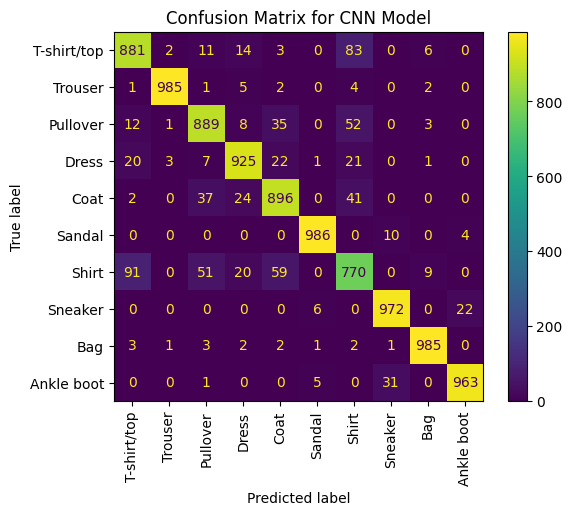

In [ ]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis = 1)
test_labels = np.argmax(np.array(test_labels),axis = 1)

cm=multilabel_confusion_matrix(test_labels,y_pred)
#print(cm)
#print(cm.shape)

print(classification_report(test_labels,y_pred, target_names=class_names))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm = confusion_matrix(test_labels, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot( values_format='d')
plt.title('Confusion Matrix for CNN Model')
plt.xticks(rotation='vertical')
plt.show()

##4. Principle Component Analysis
By applying Principal Component Analysis (PCA) to the Fashion MNIST dataset, we've effectively distilled the high-dimensional image data into a concise, informative subset of features. This dimensionality reduction allows us to visualize and interpret the underlying structure of the data more clearly, while also accelerating the training process of machine learning algorithms. Through PCA, we've captured the most significant variations among the fashion items with fewer variables, enabling more efficient data processing and potentially uncovering subtle patterns that might not be apparent in the full 784-dimensional space.

In [ ]:
n_components = 225  # (225 dimensions)
pca = PCA(n_components=n_components)
pca.fit(X_train_scale)

PCA(n_components=225)

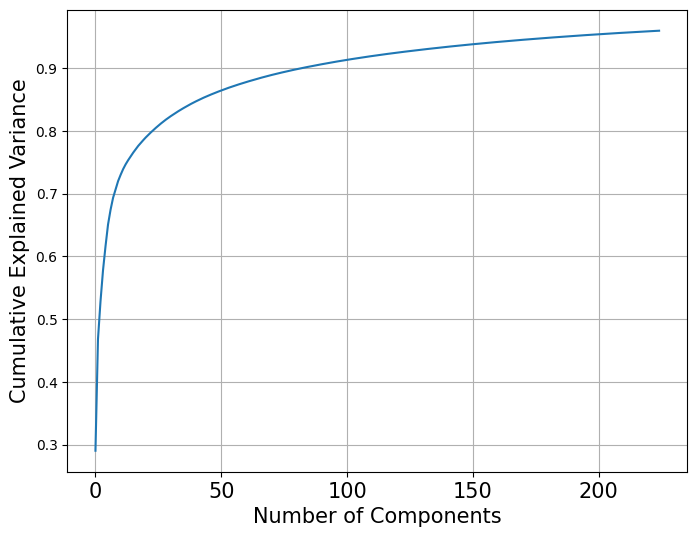

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Number of Components',fontsize = 15)
plt.ylabel('Cumulative Explained Variance',fontsize = 15)
plt.grid()
plt.show()

We observe from the plot that just with minimum 144 dimensions, we can capture more than 90% of variance.

In [ ]:
train_pca = pca.transform(X_train_scale)
test_pca = pca.transform(X_test_scale)

In [ ]:
reconstructed_images = pca.inverse_transform(train_pca)
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)
reconstructed_images = reconstructed_images*255

In [ ]:
reconstructed_images.shape

(60000, 28, 28)

In [ ]:
class_names=['top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

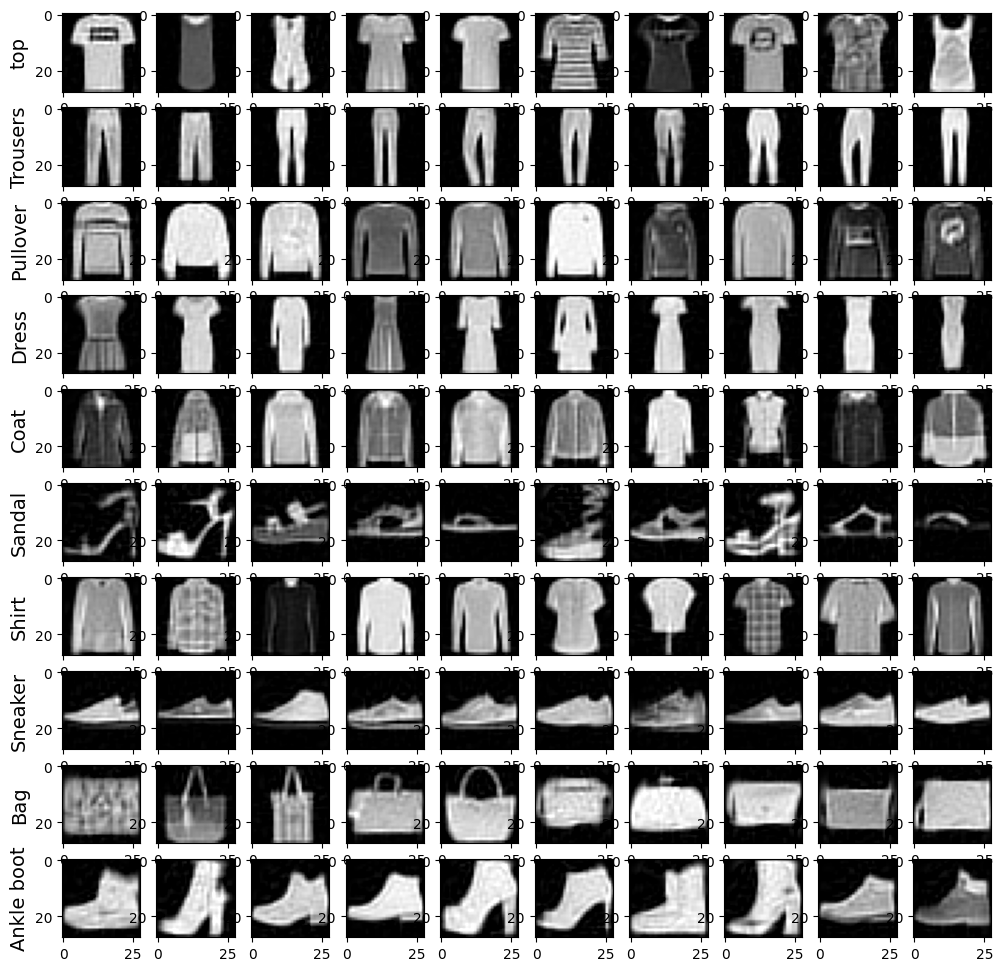

In [ ]:

fig, axes = plt.subplots(10, 10, figsize=(12,12))
for i in range(10):
  for j in range(10):
    axes[i, j].imshow(reconstructed_images[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(class_names[i], fontsize=14)

From the above plot, we observe that most of data information is retained with the reduced dimensions from PCA.

##5. Model Selection
During the model selection phase, we systematically trained and fine-tuned various algorithms, meticulously optimizing their hyperparameters. This rigorous approach allowed us to compare their performances objectively, ultimately guiding us to identify the single most effective model for our Fashion MNIST dataset analysis.

###5.1. SVM
Support Vector Machines

SVC hyperparamater tuning

In [ ]:
model3 = SVC()
param_grid = {
    'C': [ 1, 10],  # Regularization parameter
    'kernel': ['poly', 'rbf'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Create a grid search using cross-validation
grid_search = GridSearchCV(model3, param_grid, cv=cv,verbose=3)

# Fit the grid search to your data
grid_search.fit(X_train_scale, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......C=1, gamma=auto, kernel=poly;, score=0.665 total time=24.6min
[CV 2/5] END ......C=1, gamma=auto, kernel=poly;, score=0.663 total time=25.2min
[CV 3/5] END ......C=1, gamma=auto, kernel=poly;, score=0.665 total time=24.8min
[CV 4/5] END ......C=1, gamma=auto, kernel=poly;, score=0.661 total time=25.9min
[CV 5/5] END ......C=1, gamma=auto, kernel=poly;, score=0.665 total time=28.1min
[CV 1/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.854 total time=10.8min
[CV 2/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.854 total time=10.4min
[CV 3/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.856 total time=10.7min
[CV 4/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.855 total time=10.2min
[CV 5/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.851 total time=10.7min
[CV 1/5] END .....C=10, gamma=auto, kernel=poly;, score=0.767 total time=14.5min
[CV 2/5] END .....C=10, gamma=auto, kernel=poly;,

In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


SVC

The score for SVM is 0.8716
              precision    recall  f1-score   support

         top       0.81      0.84      0.82      1000
    Trousers       0.98      0.96      0.97      1000
    Pullover       0.78      0.80      0.79      1000
       Dress       0.85      0.89      0.87      1000
        Coat       0.78      0.81      0.80      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.70      0.61      0.65      1000
     Sneaker       0.92      0.95      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



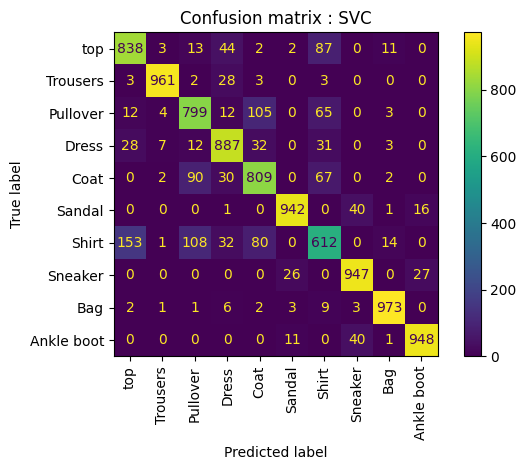

In [ ]:
svc = SVC(**best_params)
svc.fit(X_train_scale, Y_train)
svc_pred = svc.predict(X_test_scale)
acc = svc.score(X_test_scale,Y_test)
print(f'The score for SVM is {acc}')
cm=multilabel_confusion_matrix(Y_test,svc_pred)
y_pred = svc.predict(X_test_scale)

print(classification_report(Y_test, svc_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    svc, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : SVC')
plt.tight_layout()
plt.show()

SVM with PCA

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......C=1, gamma=auto, kernel=poly;, score=0.764 total time= 6.3min
[CV 2/5] END ......C=1, gamma=auto, kernel=poly;, score=0.766 total time= 6.3min
[CV 3/5] END ......C=1, gamma=auto, kernel=poly;, score=0.767 total time= 6.4min
[CV 4/5] END ......C=1, gamma=auto, kernel=poly;, score=0.768 total time= 6.4min
[CV 5/5] END ......C=1, gamma=auto, kernel=poly;, score=0.769 total time= 6.5min
[CV 1/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.875 total time= 3.1min
[CV 2/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.874 total time= 3.1min
[CV 3/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.872 total time= 3.2min
[CV 4/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.876 total time= 3.2min
[CV 5/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.875 total time= 3.1min
[CV 1/5] END .....C=10, gamma=auto, kernel=poly;, score=0.855 total time= 3.4min
[CV 2/5] END .....C=10, gamma=auto, kernel=poly;,

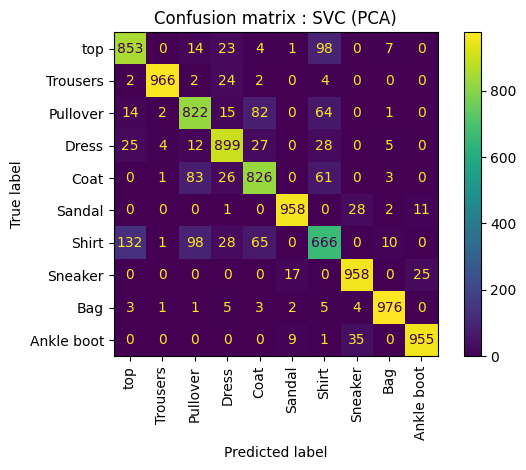

In [ ]:
model3 = SVC()
param_grid = {
    'C': [ 1, 10],  # Regularization parameter
    'kernel': ['poly', 'rbf'],  # Kernel type
    'gamma': ['auto'],  # Kernel coefficient
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Create a grid search using cross-validation
grid_search = GridSearchCV(model3, param_grid, cv=cv,verbose=3)

# Fit the grid search to your data
grid_search.fit(train_pca, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

model3=SVC(**best_params)
model3.fit(train_pca,Y_train)
print(f'SVC with PCA score:{model3.score(test_pca,Y_test)}')
svc_pred=model3.predict(test_pca)
cm=multilabel_confusion_matrix(Y_test,svc_pred)
print(classification_report(Y_test, svc_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    model3, test_pca,Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : SVC (PCA)')
plt.tight_layout()
plt.show()

###5.2. Random Forest

Random Forest Hyperparamter tuning

In [ ]:
#Random Forest
rf=RandomForestClassifier()
params_rf={'n_estimators':[50,100],
    'criterion':['entropy'],
    'min_samples_split':[2],
    'max_samples': [None],
     'max_depth':[100]
    }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_rf=GridSearchCV(rf,params_rf,cv=cv,verbose=3)

grid_rf.fit(X_train_scale,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.882 total time=  39.2s
[CV 2/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.880 total time=  38.5s
[CV 3/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.883 total time=  39.4s
[CV 4/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.881 total time=  38.7s
[CV 5/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.880 total time=  41.7s
[CV 1/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=100;, score=0.881 total time= 1.3min
[CV 2/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=100;, score=0.884 total time= 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [100],
                         'max_samples': [None], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             verbose=3)

In [ ]:
best_params = grid_rf.best_params_
print("best paramters random forest: ",grid_rf.best_params_)

best paramters random forest:  {'criterion': 'entropy', 'max_depth': 100, 'max_samples': None, 'min_samples_split': 2, 'n_estimators': 100}


RandomForest Classifier

RandomForest score: 0.877
              precision    recall  f1-score   support

         top       0.81      0.86      0.84      1000
    Trousers       0.99      0.96      0.98      1000
    Pullover       0.77      0.80      0.79      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.58      0.64      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



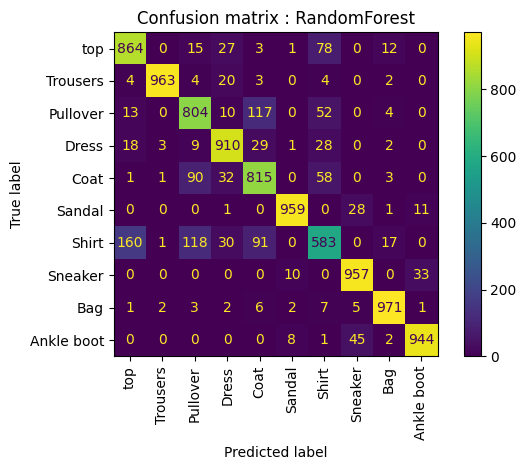

In [ ]:
rf=RandomForestClassifier(**best_params)
rf.fit(X_train_scale,Y_train)
print(f'RandomForest score: {rf.score(X_test_scale,Y_test)}')
y_pred_rf=rf.predict(X_test_scale)
cm=multilabel_confusion_matrix(Y_test,y_pred_rf)
y_pred = rf.predict(X_test_scale)

print(classification_report(Y_test, y_pred_rf, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    rf, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : RandomForest')
plt.tight_layout()
plt.show()

RandomForest with PCA

In [ ]:
#Random Forest
rf=RandomForestClassifier()
params_rf={'n_estimators':[50,100],
    'criterion':['entropy'],
    'min_samples_split':[2],
    'max_samples': [None],
     'max_depth':[100]
    }
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_rf=GridSearchCV(rf,params_rf,cv=cv,verbose=3)

grid_rf.fit(train_pca,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.858 total time= 1.8min
[CV 2/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.861 total time= 1.8min
[CV 3/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.859 total time= 1.8min
[CV 4/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.858 total time= 1.7min
[CV 5/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=50;, score=0.857 total time= 1.8min
[CV 1/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=100;, score=0.864 total time= 3.5min
[CV 2/5] END criterion=entropy, max_depth=100, max_samples=None, min_samples_split=2, n_estimators=100;, score=0.865 total time= 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [100],
                         'max_samples': [None], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             verbose=3)

In [ ]:
best_params = grid_rf.best_params_

RandomForest score with pca: 0.8588
              precision    recall  f1-score   support

         top       0.78      0.86      0.82      1000
    Trousers       1.00      0.95      0.97      1000
    Pullover       0.76      0.80      0.78      1000
       Dress       0.86      0.89      0.87      1000
        Coat       0.77      0.80      0.78      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.71      0.54      0.61      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.93      0.96      0.94      1000
  Ankle boot       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



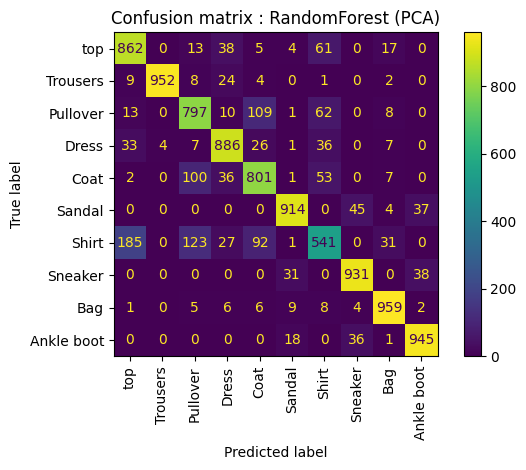

In [ ]:
rf=RandomForestClassifier(**best_params)
rf.fit(train_pca,Y_train)
print(f'RandomForest score with pca: {rf.score(test_pca,Y_test)}')
y_pred_rf=rf.predict(test_pca)
cm=multilabel_confusion_matrix(Y_test,y_pred_rf)

print(classification_report(Y_test, y_pred_rf, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    rf, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : RandomForest (PCA)')
plt.tight_layout()
plt.show()

###5.3. K Nearest Neighbours (KNN)

KNN Hyperparameter Tuning

In [ ]:
#knn
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5,9],
    'weights': ['distance','uniform'],
    'p': [1, 2]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(knn, param_grid, cv=cv,verbose=3)

grid_search.fit(X_train_scale, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=0.859 total time=10.1min
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.860 total time=10.1min
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.863 total time=10.1min
[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.865 total time=10.1min
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=0.864 total time=10.1min
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=0.859 total time=10.1min
[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.859 total time=10.1min
[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=0.862 total time=10.1min
[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.862 total time=10.1min
[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=0.864 total time=10.1min
[CV 1/5] END n_neighbors=5, p=2, weights=distance;, score=0.855 total time=  35.2s
[CV 2/5] END n_neighbors=5, p=2,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 9], 'p': [1, 2],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [ ]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


KNN Classifier

KNN score :0.8554
              precision    recall  f1-score   support

         top       0.77      0.85      0.81      1000
    Trousers       0.99      0.97      0.98      1000
    Pullover       0.73      0.82      0.77      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.79      0.77      0.78      1000
      Sandal       0.99      0.82      0.90      1000
       Shirt       0.66      0.57      0.61      1000
     Sneaker       0.88      0.96      0.92      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



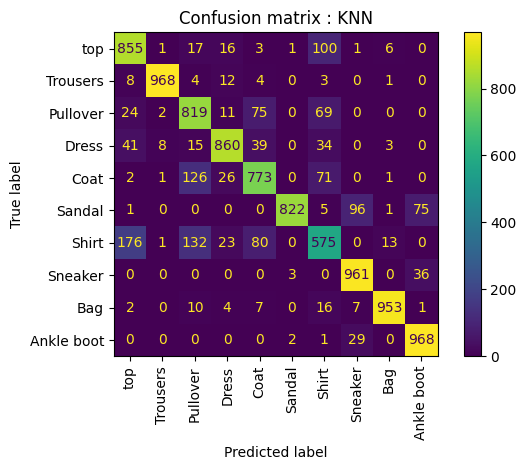

In [ ]:
neigh=KNeighborsClassifier()
neigh.fit(X_train_scale,Y_train)
print(f'KNN score :{neigh.score(X_test_scale,Y_test)}')
y_pred = neigh.predict(X_test_scale)

print(classification_report(Y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    neigh, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : KNN')
plt.tight_layout()
plt.show()

KNN with PCA

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=0.864 total time= 2.9min
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.867 total time= 3.0min
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.865 total time= 2.9min
[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.865 total time= 3.0min
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=0.863 total time= 3.0min
[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=0.862 total time= 2.9min
[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.865 total time= 3.0min
[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=0.864 total time= 2.9min
[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.862 total time= 3.0min
[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=0.862 total time= 3.0min
[CV 1/5] END n_neighbors=5, p=2, weights=distance;, score=0.864 total time=  10.5s
[CV 2/5] END n_neighbors=5, p=2,

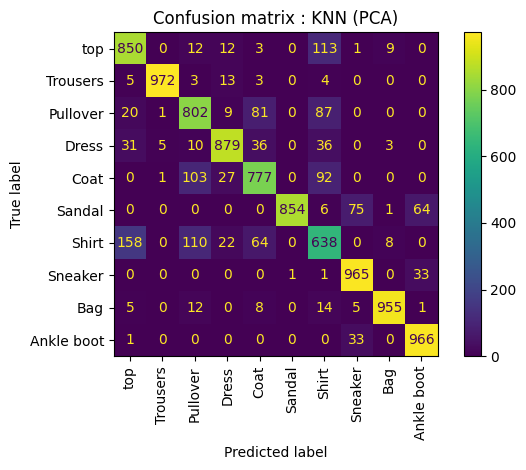

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5,9],
    'weights': ['distance','uniform'],
    'p': [1, 2]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(knn, param_grid, cv=cv,verbose=3)

grid_search.fit(train_pca, Y_train)


print("Best parameters: ", grid_search.best_params_)
best_params=grid_search.best_params_

neigh=KNeighborsClassifier(**best_params)
neigh.fit(train_pca,Y_train)
print(f'KNN score with pca:{neigh.score(test_pca,Y_test)}')
y_pred = neigh.predict(test_pca)

print(classification_report(Y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    neigh, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : KNN (PCA)')
plt.tight_layout()
plt.show()

###5.4. NaiveBayes Classifier Model

NaiveBayes Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.650 total time=   1.7s
[CV 2/5] END .................var_smoothing=1.0;, score=0.651 total time=   1.6s
[CV 3/5] END .................var_smoothing=1.0;, score=0.646 total time=   1.9s
[CV 4/5] END .................var_smoothing=1.0;, score=0.646 total time=   3.5s
[CV 5/5] END .................var_smoothing=1.0;, score=0.651 total time=   2.3s
[CV 1/5] END .................var_smoothing=0.1;, score=0.674 total time=   1.7s
[CV 2/5] END .................var_smoothing=0.1;, score=0.677 total time=   2.1s
[CV 3/5] END .................var_smoothing=0.1;, score=0.676 total time=   2.2s
[CV 4/5] END .................var_smoothing=0.1;, score=0.677 total time=   2.1s
[CV 5/5] END .................var_smoothing=0.1;, score=0.679 total time=   3.4s
[CV 1/5] END ................var_smoothing=0.01;, score=0.665 total time=   3.4s
[CV 2/5] END ................var_smoothing=0.01;

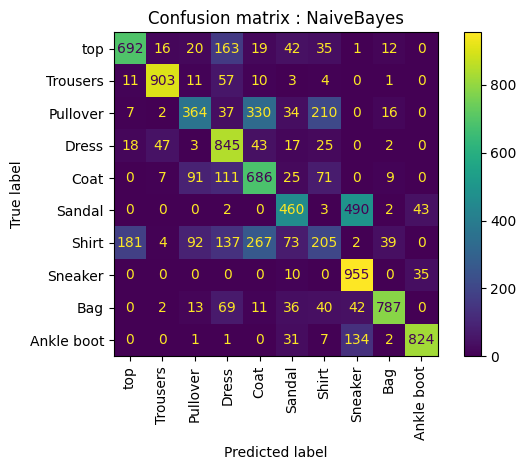

In [ ]:
gnb = GaussianNB()
param_grid = {
    'var_smoothing':np.logspace(0,-9, num=10)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(gnb, param_grid, cv=cv,verbose=3)

grid_search.fit(X_train_scale, Y_train)


print("Best parameters: ", grid_search.best_params_)
best_params=grid_search.best_params_
gnb= GaussianNB(**best_params)
gnb.fit(X_train_scale,Y_train)
print(f'NB score:{gnb.score(X_test_scale,Y_test)}')
gnb_pred = gnb.predict(X_test_scale)

print(classification_report(Y_test, gnb_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    gnb, X_test_scale, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : NaiveBayes')
plt.tight_layout()
plt.show()


NaiveBayes with PCA

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.655 total time=   0.4s
[CV 2/5] END .................var_smoothing=1.0;, score=0.657 total time=   0.4s
[CV 3/5] END .................var_smoothing=1.0;, score=0.655 total time=   0.6s
[CV 4/5] END .................var_smoothing=1.0;, score=0.657 total time=   0.6s
[CV 5/5] END .................var_smoothing=1.0;, score=0.659 total time=   0.6s
[CV 1/5] END .................var_smoothing=0.1;, score=0.701 total time=   0.5s
[CV 2/5] END .................var_smoothing=0.1;, score=0.702 total time=   0.5s
[CV 3/5] END .................var_smoothing=0.1;, score=0.703 total time=   0.5s
[CV 4/5] END .................var_smoothing=0.1;, score=0.701 total time=   0.5s
[CV 5/5] END .................var_smoothing=0.1;, score=0.703 total time=   0.4s
[CV 1/5] END ................var_smoothing=0.01;, score=0.684 total time=   0.3s
[CV 2/5] END ................var_smoothing=0.01;

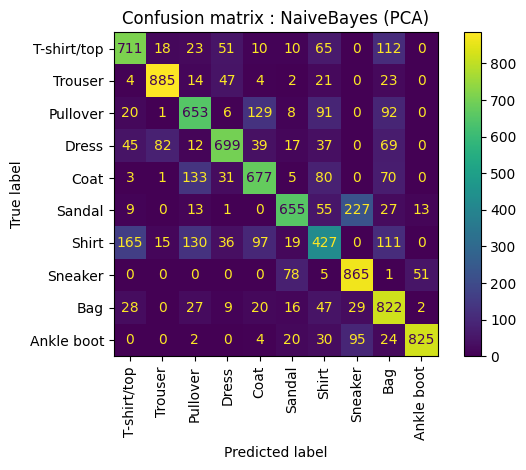

In [ ]:
gnb = GaussianNB()
param_grid = {
    'var_smoothing':np.logspace(0,-9, num=10)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(gnb, param_grid, cv=cv,verbose=3)

grid_search.fit(train_pca, Y_train)


print("Best parameters: ", grid_search.best_params_)
best_params=grid_search.best_params_
gnb= GaussianNB(**best_params)
gnb.fit(train_pca,Y_train)
print(f'NB score:{gnb.score(test_pca,Y_test)}')
gnb_pred = gnb.predict(test_pca)

print(classification_report(Y_test, gnb_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    gnb, test_pca, Y_test, display_labels=class_names, xticks_rotation="vertical"
)
plt.title('Confusion matrix : NaiveBayes (PCA)')
plt.tight_layout()
plt.show()

###5.5. Convolutional Neural Networks (CNN)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_X,val_X,train_y,val_y = train_test_split(train_images,train_labels,test_size = 0.2)

**Hyper-Parameter Tuning**

####5.5.1. Hyper-Parameter Tuning: Changing number of layers

In [ ]:
def create_model (filter_layers,activation):
  model = Sequential()
  for i in range(filter_layers):
    if i ==0:
      model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
      model.add(layers.Lambda(tf.nn.local_response_normalization))
      model.add(layers.Activation(activation))
      model.add(layers.MaxPooling2D(3, strides=2))
    else:
      model.add(layers.Conv2D(16*(i+1), 3 , padding='same' ))
      #model.add(layers.Lambda(tf.nn.local_response_normalization))
      model.add(layers.Activation(activation))
      #model.add(layers.MaxPooling2D(3, strides=2))


  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation=activation))
  #model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation=activation))
  #model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])
  return model

In [ ]:
filter_layers = [2,3,4,5,7]
results = []
validation_accs = []
training_accs = []

for i,l in enumerate(filter_layers):
  model = create_model(l,'relu')
  history = model.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))
  validation_accs.append(history.history['val_accuracy'])
  training_accs.append(history.history['accuracy'])
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  results.append(test_acc)


Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.4215 - accuracy: 0.8480 - val_loss: 0.3182 - val_accuracy: 0.8844
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2780 - accuracy: 0.8981 - val_loss: 0.2805 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2258 - accuracy: 0.9157 - val_loss: 0.2654 - val_accuracy: 0.9020
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1865 - accuracy: 0.9317 - val_loss: 0.2465 - val_accuracy: 0.9081
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1546 - accuracy: 0.9418 - val_loss: 0.2339 - val_accuracy: 0.9168
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1236 - accuracy: 0.9533 - val_loss: 0.2698 - val_accuracy: 0.9161
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0969 - accuracy: 0.9647 - val_loss: 0.2677 - val_accurac

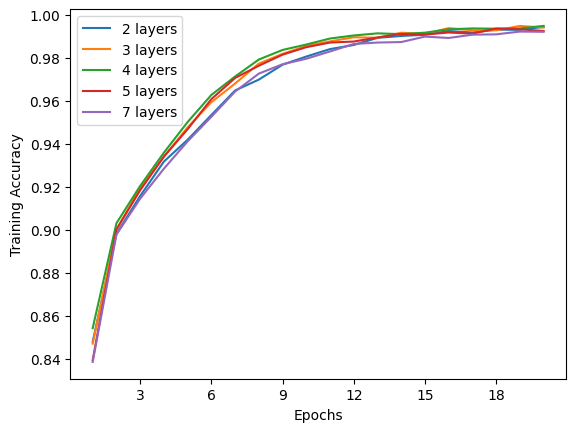

In [ ]:
for i in range(len(filter_layers)):
    plt.plot(range(1,21,1),training_accs[i], label=f'{filter_layers[i]} layers')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

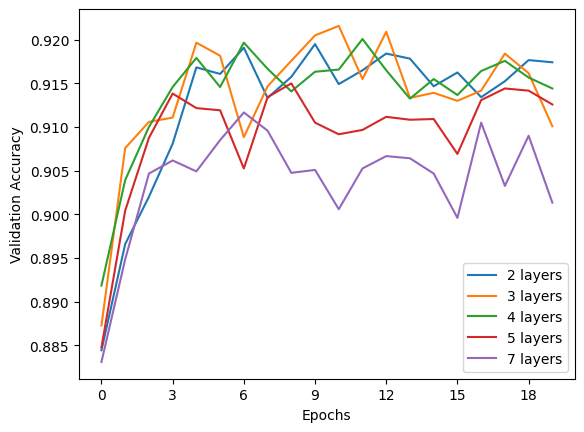

In [ ]:
for i in range(len(filter_layers)):
    plt.plot(validation_accs[i], label=f'{filter_layers[i]} layers')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
for i in range(len(filter_layers)):
  print(f'The testing accuracy of CNN model with {filter_layers[i]} layers is {results[i]} ')

The testing accuracy of CNN model with 2 layers is 0.9161999821662903 
The testing accuracy of CNN model with 3 layers is 0.9072999954223633 
The testing accuracy of CNN model with 4 layers is 0.9078999757766724 
The testing accuracy of CNN model with 5 layers is 0.9143000245094299 
The testing accuracy of CNN model with 7 layers is 0.8964999914169312 


We observe that the highest testing accuracy os obtained by building a neural network of 3 layers

####5.5.2 Hyper-Parameter Tuning: changing the Optimizer

In [ ]:
def model():
  model = Sequential()
  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))
  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))
  model.add(layers.Activation('relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer = 'adam',loss ='categorical_crossentropy',metrics = ['accuracy'])
  return model


In [ ]:
optimizers = [
    SGD(learning_rate=0.01),     # Stochastic Gradient Descent (SGD)
    Adam(learning_rate=0.01),   # Adam
    RMSprop(learning_rate=0.01), # RMSprop
    Adagrad(learning_rate=0.01)]
results = []
validation_accs = []
training_accs = []
for opt in optimizers:
    model1 = model()
    model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))
    validation_accs.append(history.history['val_accuracy'])
    training_accs.append(history.history['accuracy'])
    test_loss, test_acc = model1.evaluate(test_images, test_labels)
    results.append(test_acc)

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8797 - accuracy: 0.6703 - val_loss: 0.5425 - val_accuracy: 0.7940
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4796 - accuracy: 0.8201 - val_loss: 0.4277 - val_accuracy: 0.8460
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4039 - accuracy: 0.8520 - val_loss: 0.3755 - val_accuracy: 0.8654
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3632 - accuracy: 0.8668 - val_loss: 0.3677 - val_accuracy: 0.8690
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3357 - accuracy: 0.8781 - val_loss: 0.3429 - val_accuracy: 0.8745
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3150 - accuracy: 0.8851 - val_loss: 0.3165 - val_accuracy: 0.8864
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2975 - accuracy: 0.8898 - val_loss: 0.3047 - val_accuracy

In [ ]:
opt = ['SGD', 'Adam', 'RMSprop', 'Adagrad']

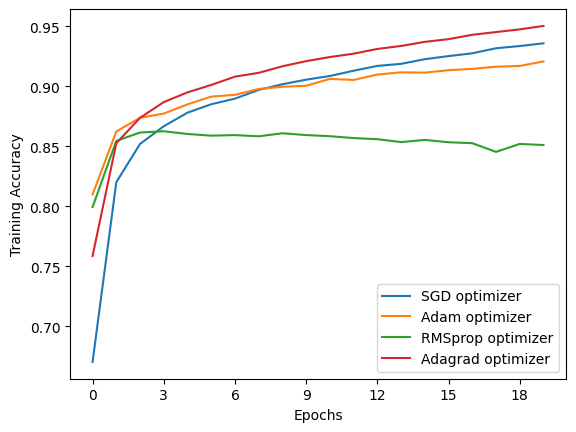

In [ ]:
for i in range(len(opt)):
    plt.plot(training_accs[i], label=f'{opt[i]} optimizer')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

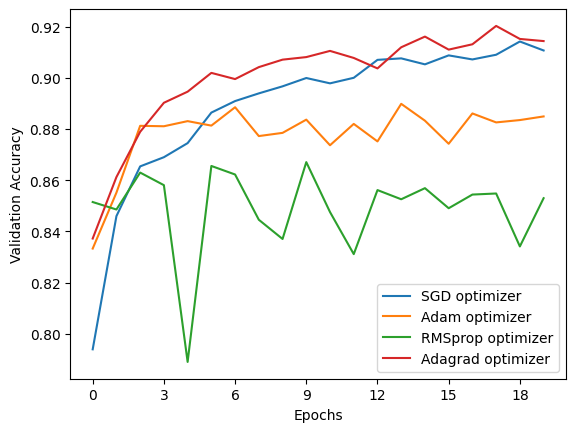

In [ ]:
for i in range(len(opt)):
    plt.plot(validation_accs[i], label=f'{opt[i]} optimizer')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

In [ ]:
for i in range(len(opt)):
  print(f'The testing accuracy obtained using {opt[i]} optimizer is {results[i]}')

The testing accuracy obtained using SGD optimizer is 0.9085999727249146
The testing accuracy obtained using Adam optimizer is 0.8784000277519226
The testing accuracy obtained using RMSprop optimizer is 0.8442000150680542
The testing accuracy obtained using Adagrad optimizer is 0.9144999980926514


We observe that the highest testing accuracy is obtained using Adagrad optimizer

####5.5.3 Hyper-Parameter Tuning: Changing the learning rate

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []
training_accs = []
validation_accs = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
    model1 = model()
    model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(train_X,train_y, batch_size=32, epochs=20, validation_data=(val_X,val_y))
    validation_accs.append(history.history['val_accuracy'])
    training_accs.append(history.history['accuracy'])
    test_loss, test_acc = model1.evaluate(test_images, test_labels)
    results.append(test_acc)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4956 - accuracy: 0.8118 - val_loss: 0.3192 - val_accuracy: 0.8835
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2865 - accuracy: 0.8942 - val_loss: 0.2751 - val_accuracy: 0.8973
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2319 - accuracy: 0.9145 - val_loss: 0.2604 - val_accuracy: 0.9062
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1934 - accuracy: 0.9270 - val_loss: 0.2412 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1611 - accuracy: 0.9388 - val_loss: 0.2367 - val_accuracy: 0.9188
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1311 - accuracy: 0.9509 - val_loss: 0.2480 - val_accuracy: 0.9124
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1068 - accuracy: 0.9602 - val_loss: 0.2599 - val_accuracy:

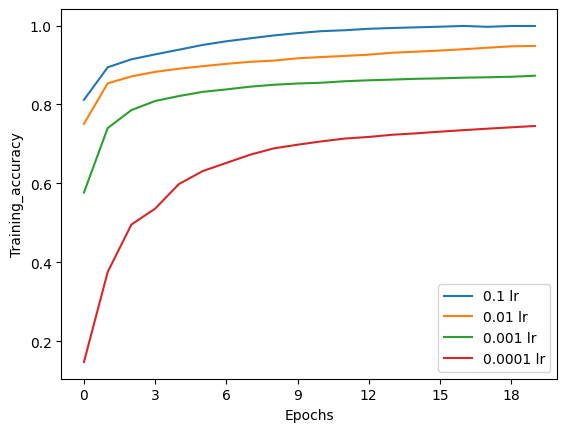

In [ ]:
for i in range(len(learning_rates)):
    plt.plot(training_accs[i], label=f'{learning_rates[i]} lr')

plt.xlabel('Epochs')
plt.ylabel('Training_accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

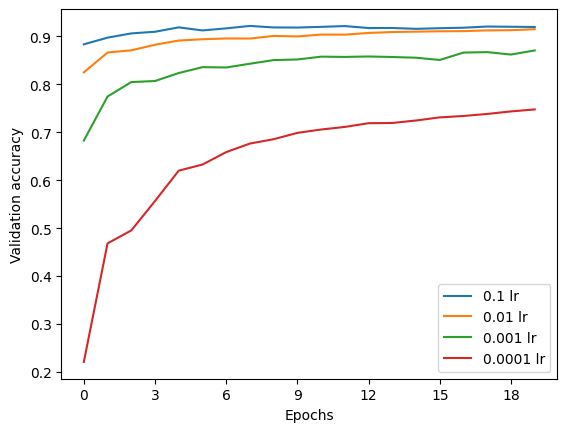

In [ ]:
for i in range(len(learning_rates)):
    plt.plot(validation_accs[i], label=f'{learning_rates[i]} lr')

plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

In [ ]:
for i in range(len(learning_rates)):
  print(f'The testing accuracy obtained for a learning rate of {learning_rates[i]} is {results[i]}')

The testing accuracy obtained for a learning rate of 0.1 is 0.9190000295639038
The testing accuracy obtained for a learning rate of 0.01 is 0.911899983882904
The testing accuracy obtained for a learning rate of 0.001 is 0.8677999973297119
The testing accuracy obtained for a learning rate of 0.0001 is 0.7422000169754028


We observe that for Adagrad optimizer changing the learning rate to 0.1 increase our model accuracy.

The training accuracy saturates after 12th epoch from above graph and if we train for more than 12 epochs it starts to overfit. To avoid this, we decrease the number of training epochs and add dropout between layers

###5.6 Final Model
Of all the models, CNN is observed to be performing well after hyperparameter tuning. Below is the final model.

In [ ]:
def final_model():

  model = Sequential()
  model.add(layers.Conv2D(8, 3 , padding='same' ,input_shape=(28,28, 1)))
  model.add(layers.Lambda(tf.nn.local_response_normalization))
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(3, strides=2))
  model.add(layers.Conv2D(16*(2), 3 , padding='same' ))
  model.add(layers.Activation('relu'))
  model.add(layers.Conv2D(16*(3), 3 , padding='same' ))
  model.add(layers.Activation('relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model


In [ ]:
model = final_model()

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 lambda_14 (Lambda)          (None, 28, 28, 8)         0         
                                                                 
 activation_48 (Activation)  (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 32)        2336      
                                                                 
 activation_49 (Activation)  (None, 13, 13, 32)        0         
                                                     

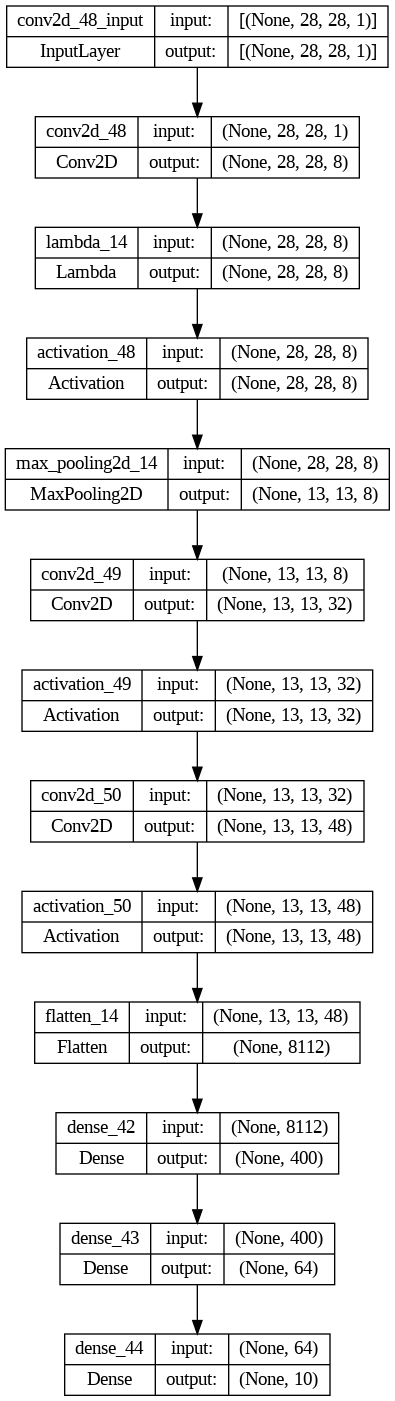

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="Team_JSS_Trained_Model.h5"
        )]

In [ ]:
model = final_model()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images,train_labels, batch_size=15, epochs=20)


Epoch 1/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.4476 - accuracy: 0.8327
Epoch 2/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.2713 - accuracy: 0.8989
Epoch 3/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.2235 - accuracy: 0.9161
Epoch 4/20
4000/4000 [==============================] - 18s 5ms/step - loss: 0.1880 - accuracy: 0.9289
Epoch 5/20
4000/4000 [==============================] - 20s 5ms/step - loss: 0.1587 - accuracy: 0.9397
Epoch 6/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.1346 - accuracy: 0.9482
Epoch 7/20
4000/4000 [==============================] - 19s 5ms/step - loss: 0.1073 - accuracy: 0.9589
Epoch 8/20
4000/4000 [==============================] - 20s 5ms/step - loss: 0.0856 - accuracy: 0.9678
Epoch 9/20
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0684 - accuracy: 0.9750
Epoch 10/20
4000/4000 [==============================] - 19s 5ms/step - l

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 0.6024 - accuracy: 0.9141


In [ ]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = model.predict(test_images)
print(y_pred.shape)
y_pred = np.argmax(y_pred,axis = 1)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [ ]:
test_labels = np.argmax(np.array(test_labels),axis = 1)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.84      0.88      0.86      1000
       Dress       0.91      0.94      0.93      1000
        Coat       0.86      0.84      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.74      0.75      1000
     Sneaker       0.97      0.96      0.97      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



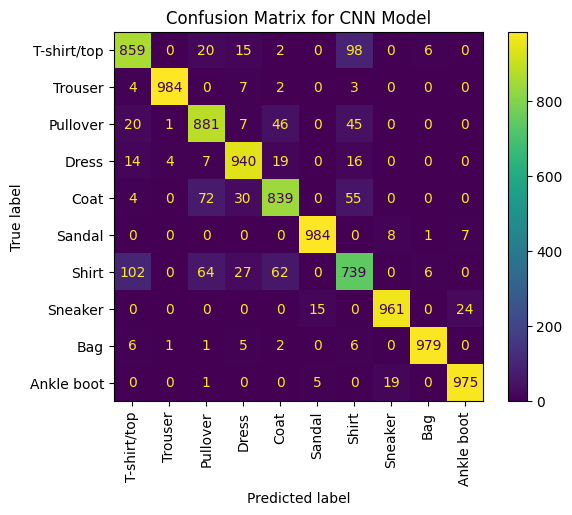

In [ ]:
cm=multilabel_confusion_matrix(test_labels,y_pred)
#print(cm)
#print(cm.shape)

print(classification_report(test_labels,y_pred, target_names=class_names))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm = confusion_matrix(test_labels, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot( values_format='d')
plt.title('Confusion Matrix for CNN Model')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 lambda_15 (Lambda)          (None, 28, 28, 8)         0         
                                                                 
 activation_51 (Activation)  (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 13, 13, 32)        2336      
                                                                 
 activation_52 (Activation)  (None, 13, 13, 32)        0         
                                                     

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))

##6. Addressing Model Interpretability

###6.1 Feature Maps

1/1 [==============================] - 0s 76ms/step


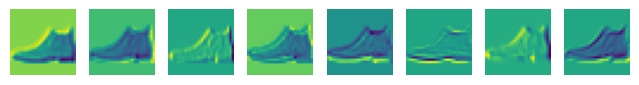

In [ ]:
#NOTE: Please replace 'conv2d_51' with any CONV2D layer you want to visualize from the above summary.

layer_name = 'conv2d_51'  # Choose the layer you want to visualize
selected_layer = model.get_layer(layer_name)

# Create a new model for visualization
feature_map_model = keras.Model(inputs=model.input, outputs=selected_layer.output)

img = np.expand_dims(test_images[0], axis=0)
 # Normalize the image if needed (check your model's preprocessing requirements)

# Get the feature maps
feature_maps = feature_map_model.predict(img)

# Plot the feature maps
plt.figure(figsize=(8, 8))
for i in range(feature_maps.shape[-1]):
    plt.subplot(8, 8, i + 1)  # Adjust the subplot grid as needed
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')  # Change the colormap as needed
    plt.axis('off')
plt.show()

###6.2 Heat Maps

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
np.expand_dims(train_images[2], axis=0).shape

(1, 28, 28, 1)

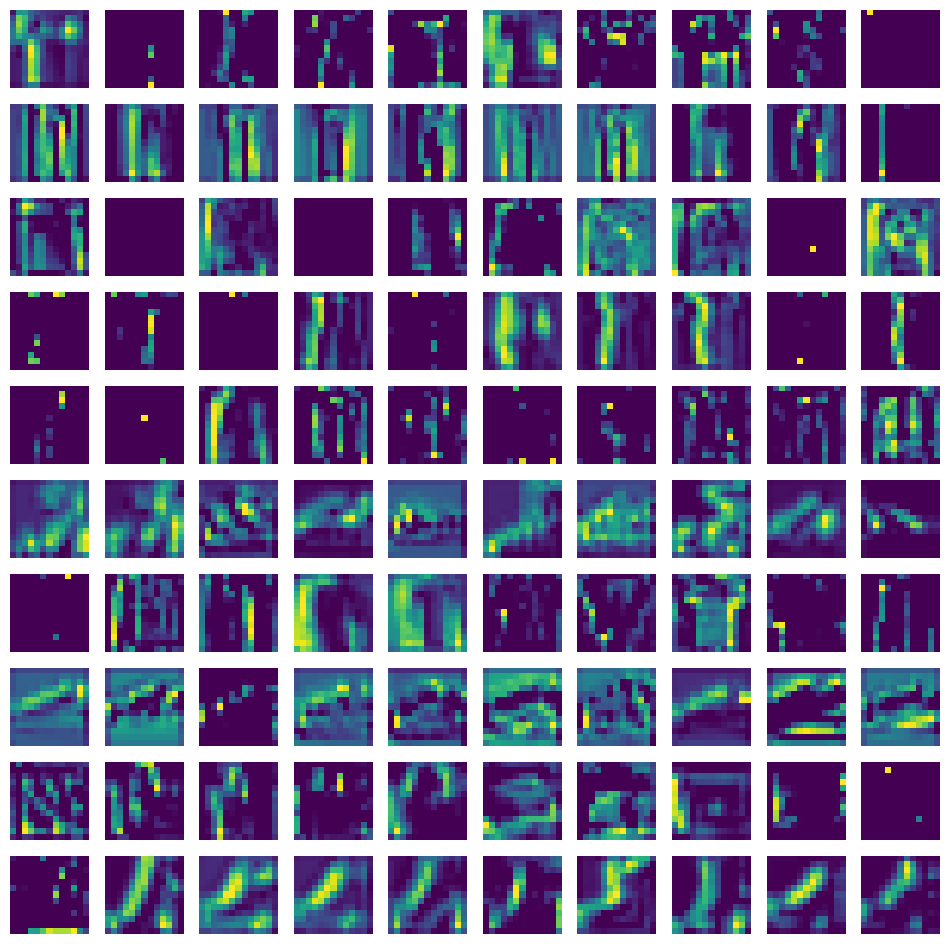

In [ ]:
#NOTE: Please replace 'conv2d_53' with the last CONV2D layer in the above summary.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for i in range(10):
  for j in range(10):
    #axes[i, j].imshow(X_train[Y_train == i][j], cmap = 'gray', vmin=0, vmax=255)
    img_array = np.expand_dims(train_images[train_labels == i][j], axis=0)
    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d_53')
    axes[i, j].matshow(heatmap)
    axes[i, j].axis('off')
    #plt.show()

for i, ax in enumerate(axes[:, 0]):
    ax.set_ylabel(class_names[i], fontsize=10)